![Cinemalytics Banner](/Users/samer/Documents/github_repos/Cinemalytics/submission/images/logo_banner.jpg)

# Cinemalytics

## Contributors:

- Anh Quy Daniel Nguyen
- Muhammed Uzair Rana
- Samer Eladad

## Required Libraries:

- pandas
- tkinter
- PIL (Pillow)
- joblib
- time
- matplotlib
- numpy
- seaborn
- scikit-learn
- os

## Introduction:

Welcome to Cinemalytics! This project is all about looking at how different types of movies do on the big streaming sites Netflix, Prime Video, and Disney+. We want to help people who make movies figure out the best place to put their work, by showing them which genres do well on which platforms and what revenue they should expect if they choose our recommended streaming platform.

At the start, we spent a lot of time getting our data right. We made sure it was clean and ready to use for our project. If you want to know more about how we did this, check out our project’s wiki here: https://github.com/ulquyorra-11/Cinemalytics/wiki.

#### Import Libraries:

In [1]:
import os
import time
from tkinter import Tk, Label, Entry, StringVar, messagebox, font, Frame, Canvas, PhotoImage
import tkinter as tk
import tkinter.ttk as ttk
from tkinter.ttk import Combobox, Style, Button as TtkButton

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from PIL import Image, ImageTk

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
from joblib import load, dump
import joblib

#### Import Data:

In [2]:
# Clean combined movies dataset
# Change path if necessary
movies_clean_path = r'https://raw.githubusercontent.com/ulquyorra-11/Cinemalytics/5da1bd9f3c477cf9c5337f0881c5eeefb3e4115b/data/clean/updated_clean_combined_movies.csv'
df = pd.read_csv(movies_clean_path)

# Separate movie DataFrames by platform and content type
netflix_df = df[df['platform'] == 'Netflix']
prime_video_df = df[df['platform'] == 'Prime Video']
disney_plus_df = df[df['platform'] == 'Disney+']

In [3]:
# Display Clean Movies dataset column names
print("\nClean Combined Movies dataset column names:")
print(df.columns.tolist())


Clean Combined Movies dataset column names:
['title', 'age_rating', 'duration_min', 'genre', 'budget', 'revenue', 'platform']


In [4]:
# Explode the movie 'genre' column for the entire dataset
df = df.assign(genre=df['genre'].str.split(', ')).explode('genre')
movies_genre_counts = df['genre'].value_counts()

# Explode the movie 'genre' column for each platform
netflix_df = netflix_df.assign(genre=netflix_df['genre'].str.split(', ')).explode('genre')
prime_video_df = prime_video_df.assign(genre=prime_video_df['genre'].str.split(', ')).explode('genre')
disney_plus_df = disney_plus_df.assign(genre=disney_plus_df['genre'].str.split(', ')).explode('genre')

# Count the number of movies by genre
netflix_movies_genre_counts = netflix_df['genre'].value_counts()
prime_video_movies_genre_counts = prime_video_df['genre'].value_counts()
disney_plus_movies_genre_counts = disney_plus_df['genre'].value_counts()

## Data Visualisation:

### Insightful Visualizations

In this section, we showcase the plots that proved instrumental in uncovering valuable insights and patterns within our dataset. These visualizations directly contributed to our understanding and decision-making processes, highlighting key trends and relationships between variables.

#### Avereage Movie Duration vs. Genre

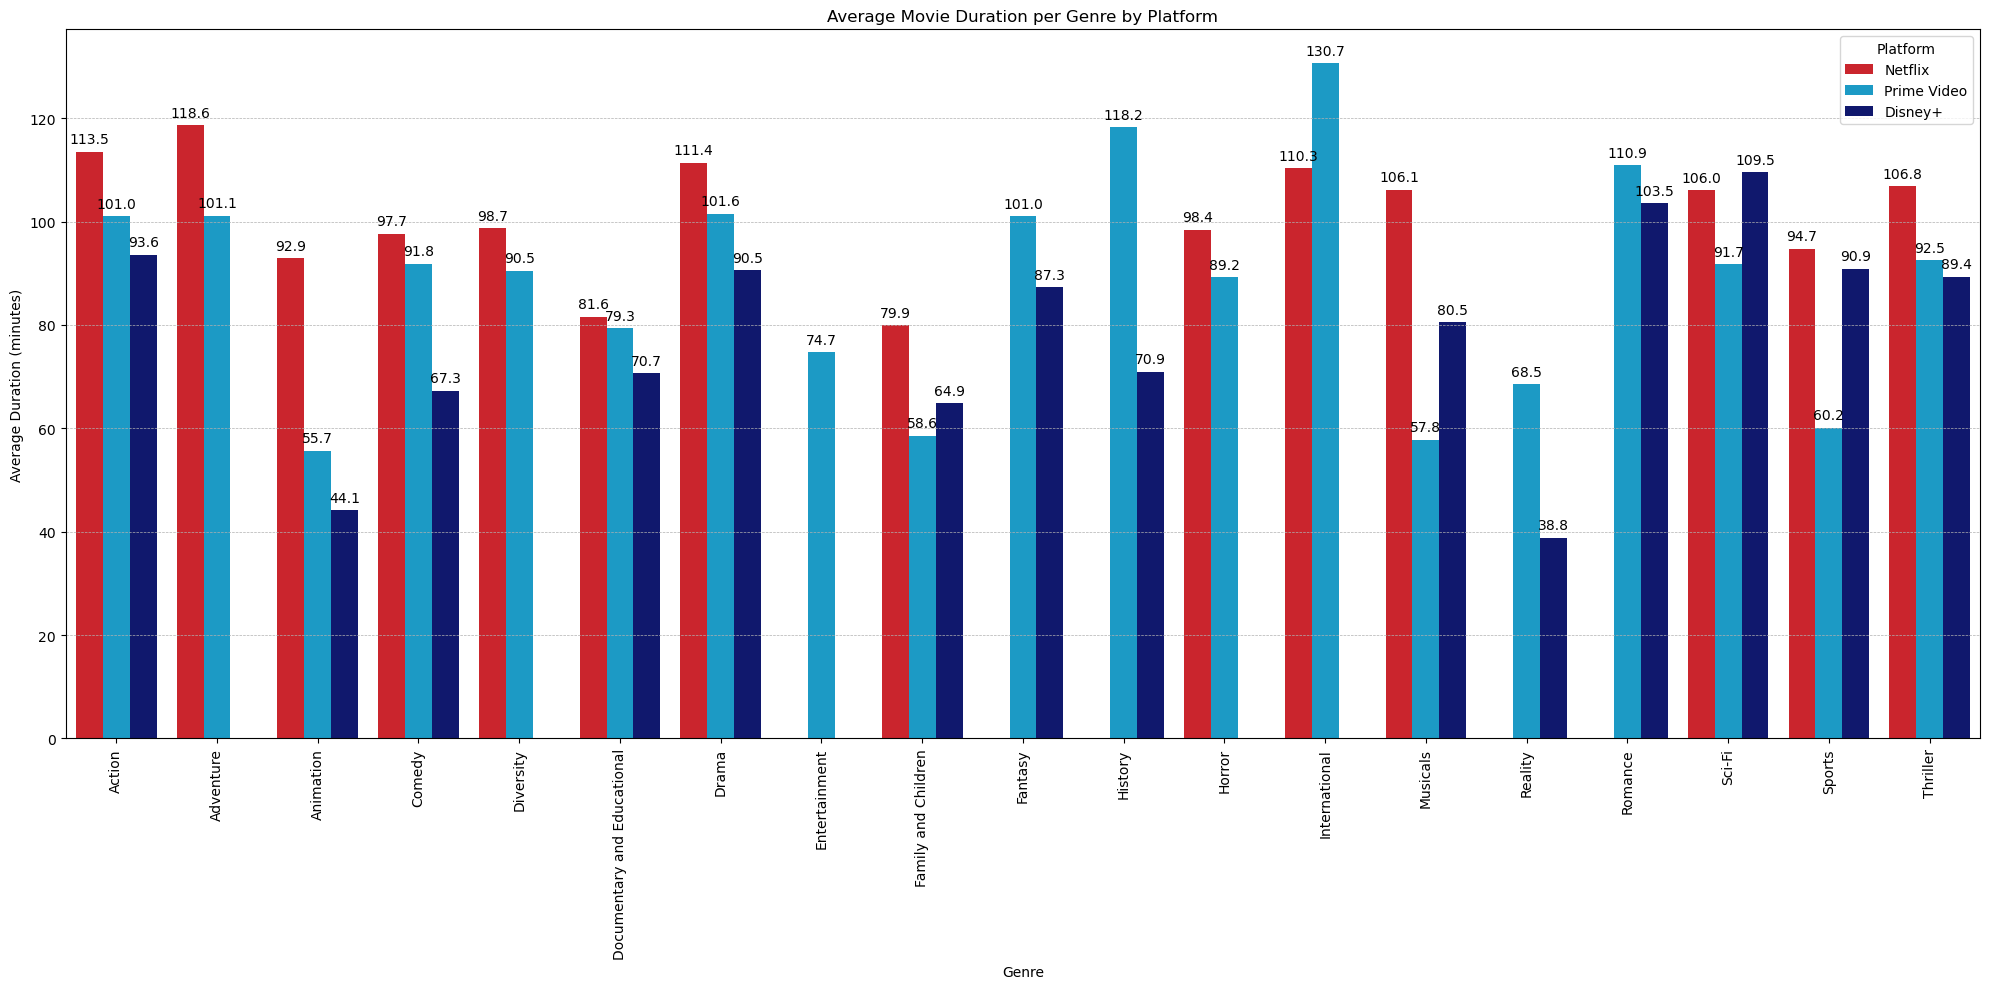

In [5]:
# Calculate average movie duration per genre for each platform
def calculate_avg_duration_per_genre(df):
    return df.groupby('genre')['duration_min'].mean()

netflix_avg_duration = calculate_avg_duration_per_genre(netflix_df)
prime_video_avg_duration = calculate_avg_duration_per_genre(prime_video_df)
disney_plus_avg_duration = calculate_avg_duration_per_genre(disney_plus_df)

# Combine the averages into a single DataFrame
avg_durations = pd.DataFrame({
    'Netflix': netflix_avg_duration,
    'Prime Video': prime_video_avg_duration,
    'Disney+': disney_plus_avg_duration
}).reset_index()

# Melt the DataFrame for easier plotting with seaborn
avg_durations_melted = avg_durations.melt(id_vars='genre', var_name='Platform', value_name='Average Duration')

# Define the colors for each platform
platform_colors = {
    'Netflix': '#E50914',
    'Prime Video': '#00A8E1',
    'Disney+': '#000c7c'
}

# Plotting with the specified colors
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='genre', y='Average Duration', hue='Platform', data=avg_durations_melted, palette=platform_colors)
plt.xticks(rotation=90)
plt.title('Average Movie Duration per Genre by Platform')
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
plt.legend(title='Platform')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='y')

# Annotate each bar with its height value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

#### Total Revenue vs. Genre

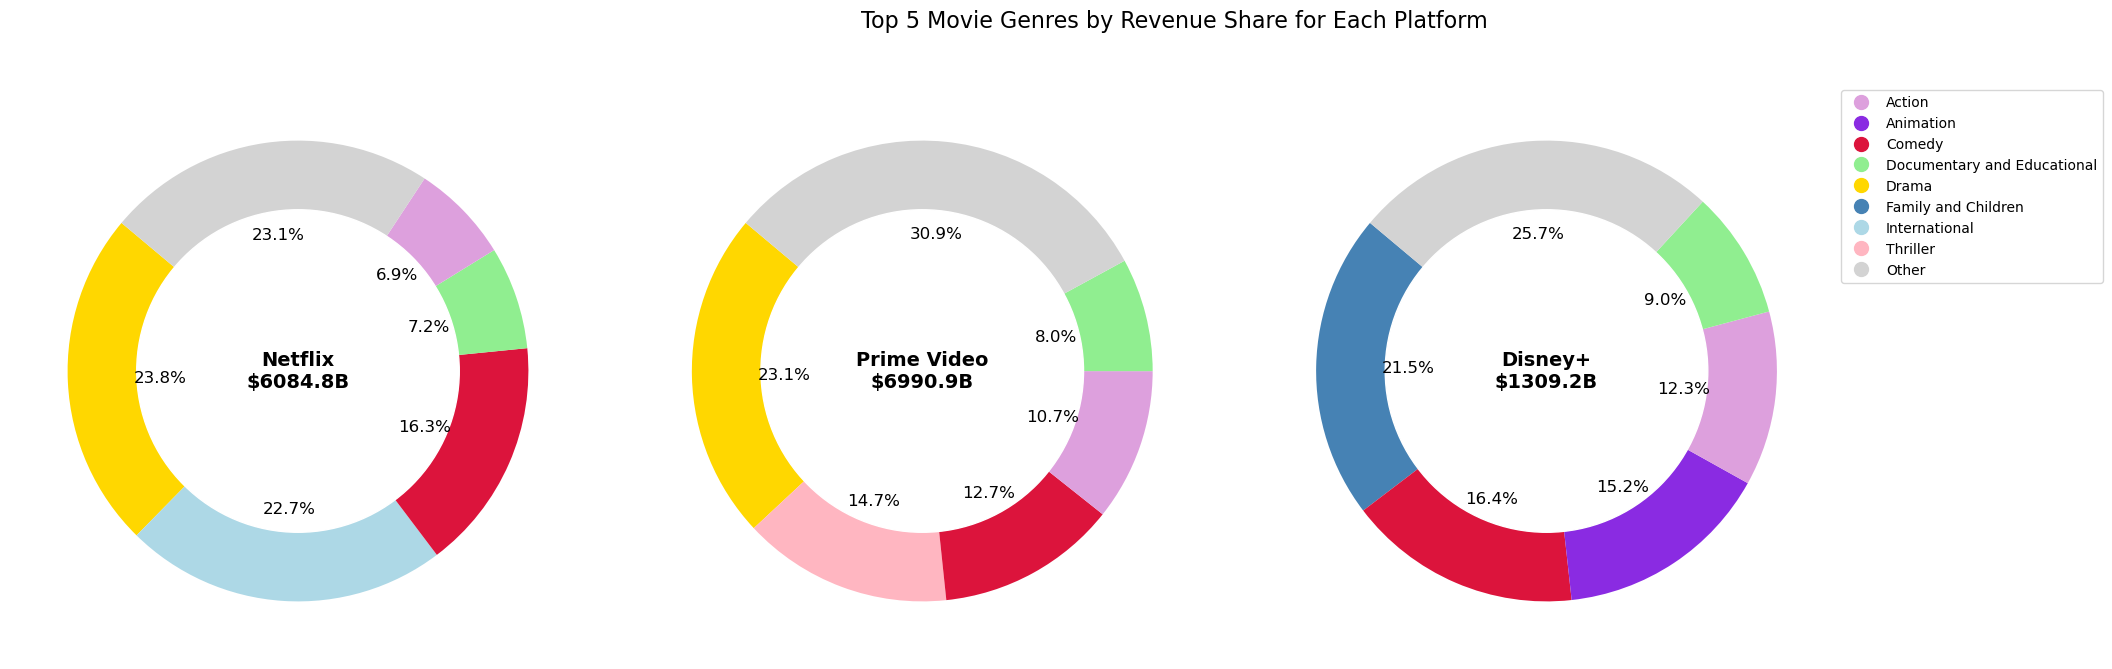

In [6]:
# Define the data preparation function
def prepare_pie_data(df, top_n=5):
    total_revenue = df.groupby('genre')['revenue'].sum().sort_values(ascending=False)
    top_genres = total_revenue.head(top_n)
    other_revenue = pd.Series(total_revenue.iloc[top_n:].sum(), index=['Other'])
    pie_data = pd.concat([top_genres, other_revenue], axis=0)
    return pie_data, total_revenue.sum()

# Prepare the data for pie charts
netflix_pie_data, netflix_total_revenue = prepare_pie_data(netflix_df)
prime_video_pie_data, prime_video_total_revenue = prepare_pie_data(prime_video_df)
disney_plus_pie_data, disney_plus_total_revenue = prepare_pie_data(disney_plus_df)

# Generate a color palette for all unique genres across platforms
all_genres = netflix_pie_data.index.union(prime_video_pie_data.index).union(disney_plus_pie_data.index).drop('Other')
unique_colors = sns.color_palette('husl', n_colors=len(all_genres))
genre_colors = dict(zip(all_genres, unique_colors))
genre_colors['Other'] = 'lightgrey'  # Set a distinct color for 'Other'
genre_colors['Action'] = 'plum'  # Set a distinct color for 'Action
genre_colors['Comedy'] = 'crimson'  # Set a distinct color for 'Adventure'
genre_colors['Documentary and Educational'] = 'lightgreen'  # Set a distinct color for 'Adventure'
genre_colors['International'] = 'lightblue'  # Set a distinct color for 'Adventure'
genre_colors['Drama'] = 'gold'  # Set a distinct color for 'Adventure'
genre_colors['Thriller'] = 'lightpink'  # Set a distinct color for 'Adventure'
genre_colors['Animation'] = 'blueviolet'  # Set a distinct color for 'Adventure'
genre_colors['Family and Children'] = 'steelblue'  # Set a distinct color for 'Adventure'

# Updated function to create a pie chart without genre labels
def create_pie_chart(data, ax, platform, total_rev):
    ax.pie(data, colors=[genre_colors[genre] for genre in data.index],
       autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=140,
       textprops={'fontsize': 12})  # Adjust the fontsize as needed
    # Center text
    ax.text(0, 0, f"{platform}\n${total_rev / 1e9:.1f}B", 
            ha='center', va='center', fontsize=14, fontweight='bold')
    # Donut chart
    centre_circle = plt.Circle((0,0), 0.70, color='white')
    ax.add_artist(centre_circle)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(24, 7))

# Create pie charts
create_pie_chart(netflix_pie_data/netflix_pie_data.sum(), axs[0], 'Netflix', netflix_total_revenue)
create_pie_chart(prime_video_pie_data/prime_video_pie_data.sum(), axs[1], 'Prime Video', prime_video_total_revenue)
create_pie_chart(disney_plus_pie_data/disney_plus_pie_data.sum(), axs[2], 'Disney+', disney_plus_total_revenue)

# Create the legend for genres
patch_list = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=genre_colors[genre], 
             label="{:s}".format(genre))[0] for genre in genre_colors]

# Adjust the position of the legend
# Move it to the right of the plots, vertically centered
plt.legend(handles=patch_list, loc='upper left', bbox_to_anchor=(1, 1))

# Set a central title for the entire figure
fig.suptitle('Top 5 Movie Genres by Revenue Share for Each Platform', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])  # Adjust the layout
plt.show()

#### Number of Movies vs. Genre

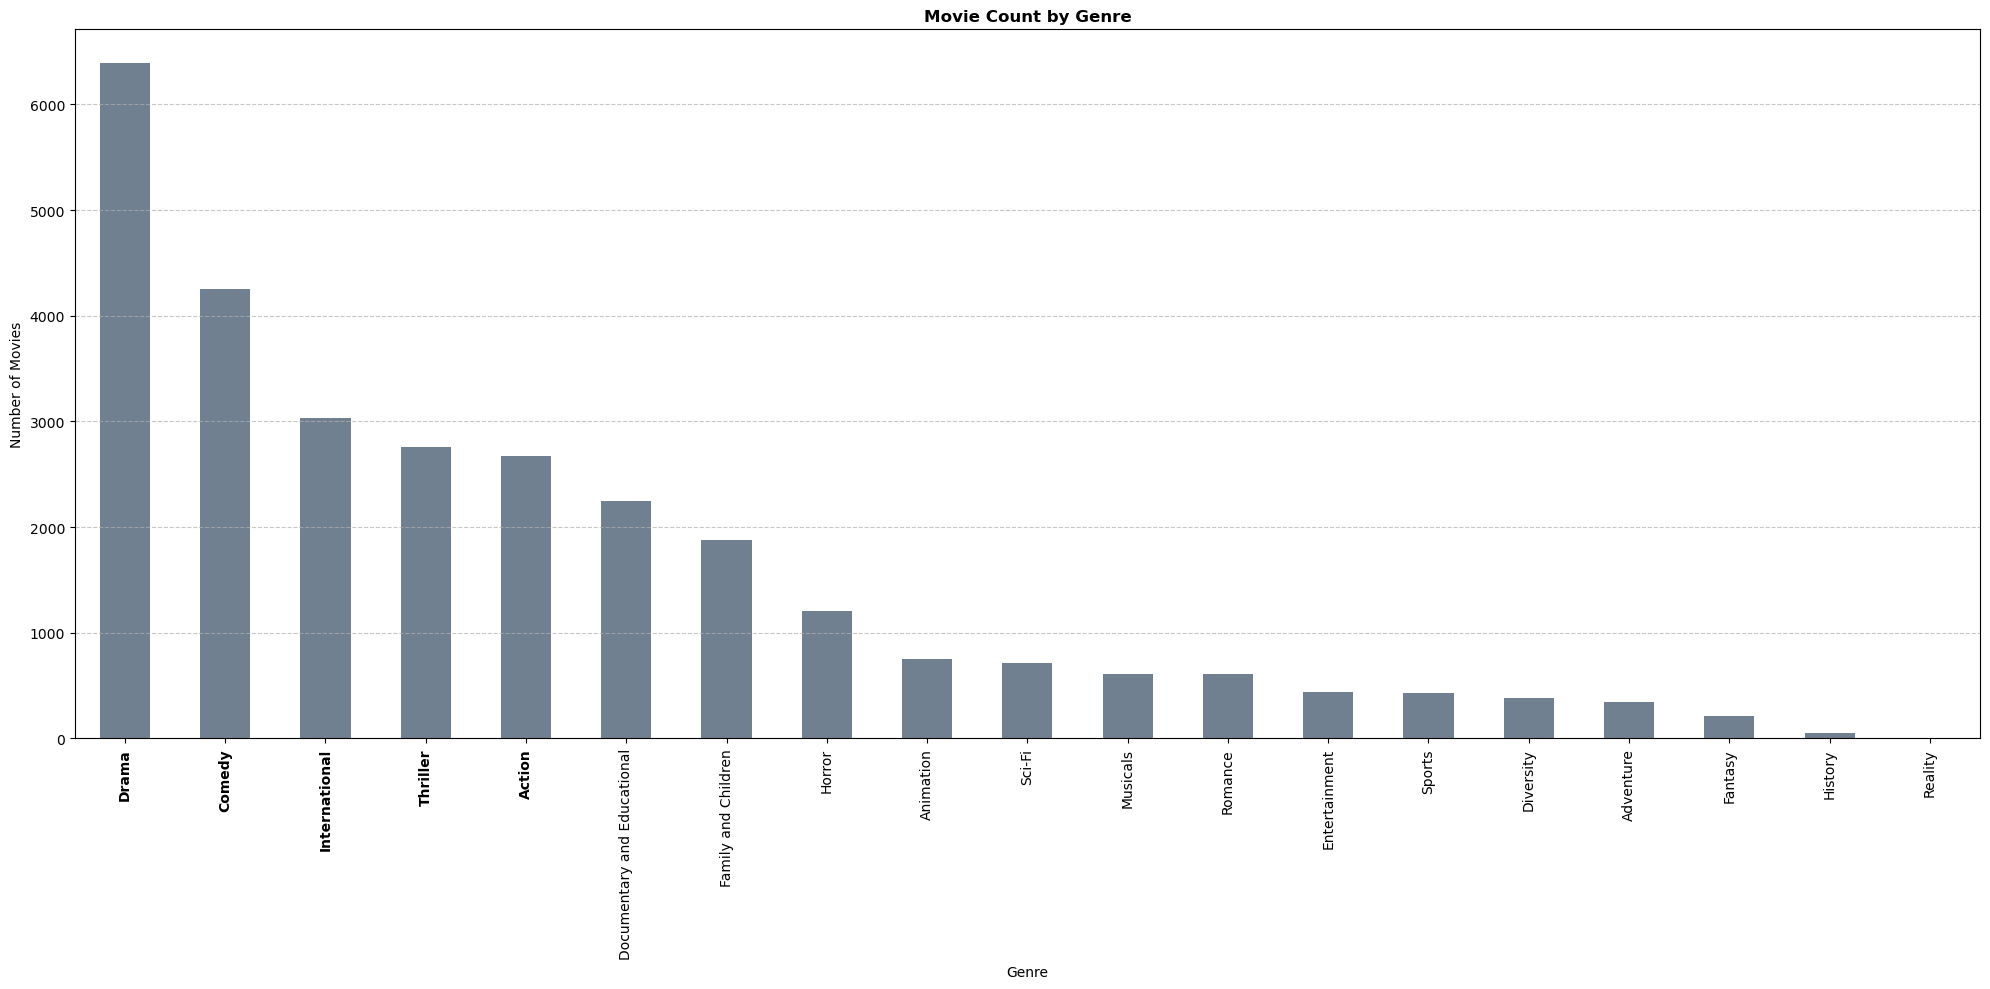

In [7]:
# Define colors for top 5 genres and other genres
# top_5_colors = ['skyblue' for genre in movies_genre_counts.index]

# Plotting all genres
plt.figure(figsize=(20, 10))

bars = movies_genre_counts.plot(kind='bar', color='slategrey')

# Adding labels and titles
plt.title('Movie Count by Genre',fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Make the front of the top 5 x-axis labels bold
for label in plt.gca().get_xticklabels():
    if label.get_text() in movies_genre_counts.head(5).index:
        label.set_weight('bold')

plt.show()

#### Number of Movies vs. Genre (Top 5 Genres)

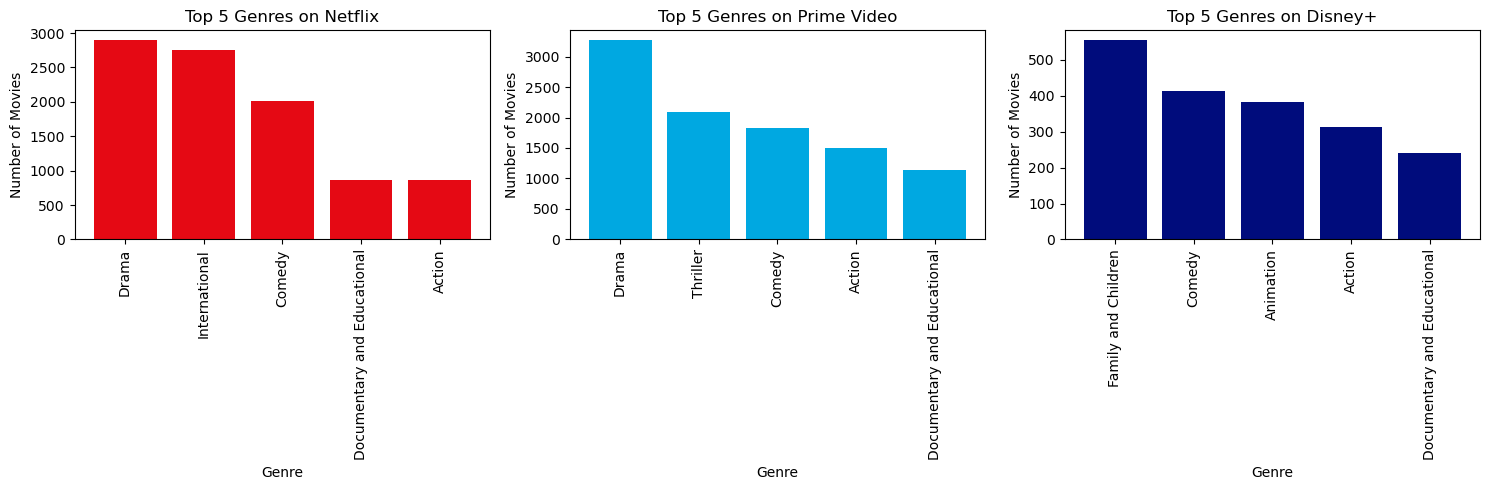

In [8]:
def plot_top5_genres(ax, df, platform_name, color):
    # Count the occurrences of each genre
    genre_counts = df['genre'].value_counts().nlargest(5)
    # Plot
    ax.bar(genre_counts.index, genre_counts.values, color=color)
    ax.set_title(f'Top 5 Genres on {platform_name}')
    ax.set_xlabel('Genre')
    ax.set_ylabel('Number of Movies')
    ax.tick_params(axis='x', rotation=90)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for Netflix
plot_top5_genres(axes[0], netflix_df, 'Netflix', color='#E50914')

# Plot for Prime Video
plot_top5_genres(axes[1], prime_video_df, 'Prime Video', color='#00A8E1')

# Plot for Disney+
plot_top5_genres(axes[2], disney_plus_df, 'Disney+', color='#000c7c')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

#### Age Rating Distributions vs. Genre (Total)

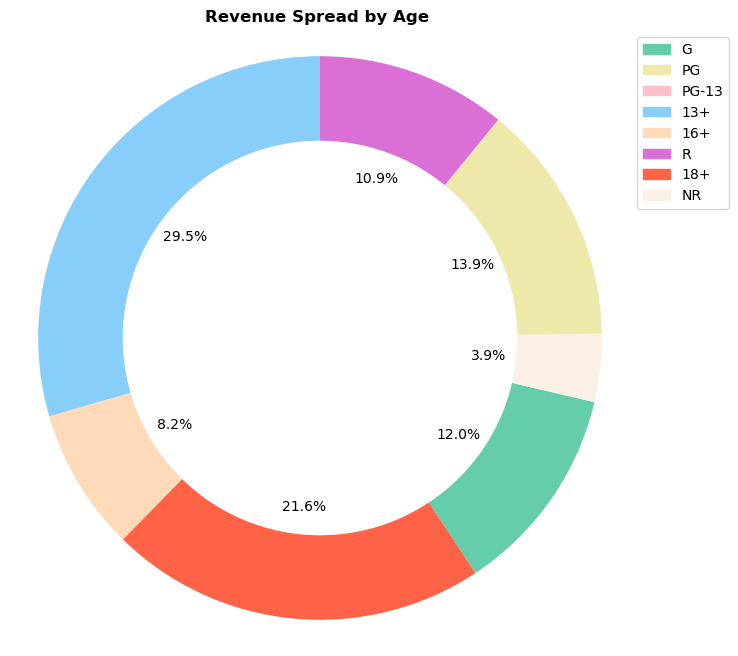

In [9]:
# Define color dictionary with fixed colors for each age rating
mediumaquamarine = mcolors.CSS4_COLORS['mediumaquamarine']
palegoldenrod = mcolors.CSS4_COLORS['palegoldenrod']
pink = mcolors.CSS4_COLORS['pink']
lightskyblue = mcolors.CSS4_COLORS['lightskyblue']
peachpuff = mcolors.CSS4_COLORS['peachpuff']
orchid = mcolors.CSS4_COLORS['orchid']
tomato = mcolors.CSS4_COLORS['tomato']
linen = mcolors.CSS4_COLORS['linen']

# Define color dictionary with fixed colors for each age rating
age_rating_colors = {
    'G': mediumaquamarine,
    'PG': palegoldenrod,
    'PG-13': pink,
    '13+': lightskyblue,
    '16+': peachpuff,
    'R': orchid,
    '18+': tomato,
    'NR': linen
}

# Group by age_rating and calculate total revenue for each age rating
revenue_by_age_rating = df.groupby('age_rating')['revenue'].sum()

# Create the legend for age_rating
patch_list = [Patch(color=color, label=age_rating) for age_rating, color in age_rating_colors.items()]

# Create a donut plot
plt.figure(figsize=(8, 8))

# Plot donut chart without age rating labels
plt.pie(revenue_by_age_rating, autopct='%1.1f%%', startangle=90,
        colors=[age_rating_colors.get(age_rating, 'lightgrey') for age_rating in revenue_by_age_rating.index])

# Draw a circle in the middle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Revenue Spread by Age ', fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add legend for age_rating
plt.legend(handles=patch_list, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

#### Age Rating Distributions vs. Genre (For each Platform)

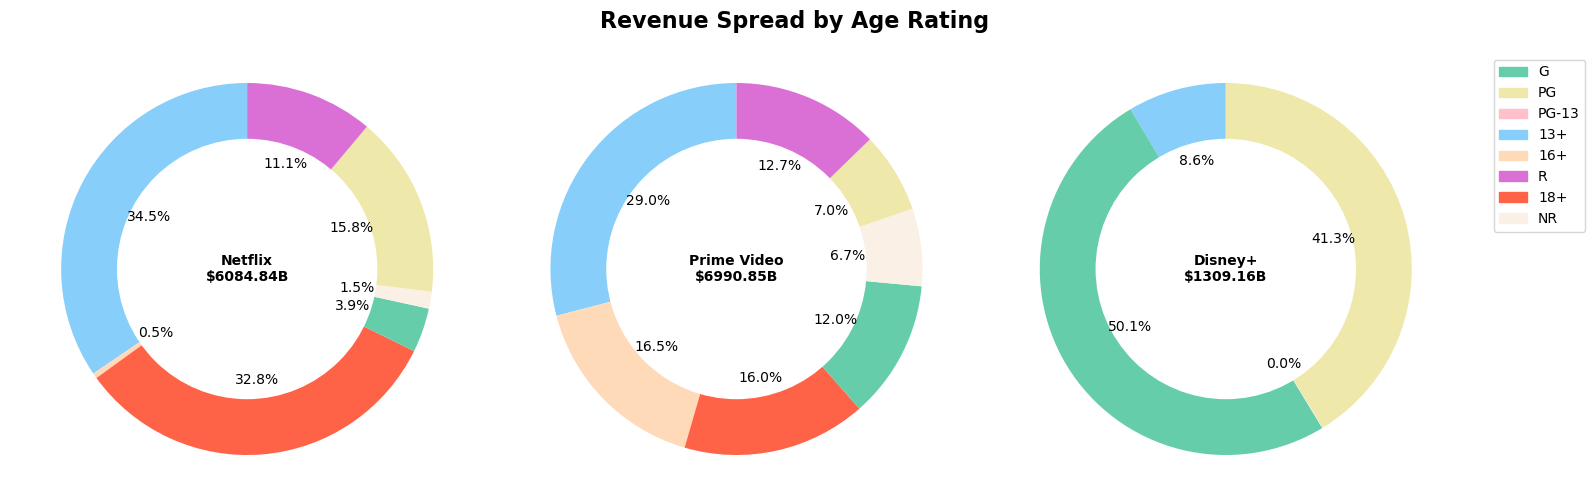

In [10]:
# Function to plot revenue - age rating distribution for a given platform
def plot_platform_distribution(platform):
    # Filter data for the given platform
    platform_df = df[df['platform'] == platform]
    
    # Group by age_rating and calculate total revenue for each age rating
    revenue_by_age_rating = platform_df.groupby('age_rating')['revenue'].sum()
    
    # Calculate total revenue for the platform in billions
    total_revenue_billion = platform_df['revenue'].sum() / 1e9
    
    # Plot donut chart
    plt.pie(revenue_by_age_rating, labels=None, autopct='%1.1f%%', startangle=90,
            colors=[age_rating_colors.get(age_rating, 'lightgrey') for age_rating in revenue_by_age_rating.index])
    
    # Draw a circle in the middle to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)
    
    # Add total revenue inside the plot
    plt.text(0, 0, f'{platform}\n${total_revenue_billion:.2f}B', horizontalalignment='center', verticalalignment='center', fontsize=10, fontweight='bold', color='black')
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')
    
    # Remove tags within the plot
    plt.ylabel('')

# Plot all distributions together
plt.figure(figsize=(16, 5))

# Plot distribution for each platform in the specified order
platform_order = ['Netflix', 'Prime Video', 'Disney+']
for i, platform in enumerate(platform_order, start=1):
    plt.subplot(1, 3, i)
    plot_platform_distribution(platform)

# Add a single headline
plt.suptitle("Revenue Spread by Age Rating", fontsize=16, fontweight='bold')

# Create legend for age_rating
patch_list = [Patch(color=color, label=age_rating) for age_rating, color in age_rating_colors.items()]

# Add a single legend for age_rating
plt.legend(handles=patch_list, loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



#### Age Rating Distribution vs. Number of Movies (Total)

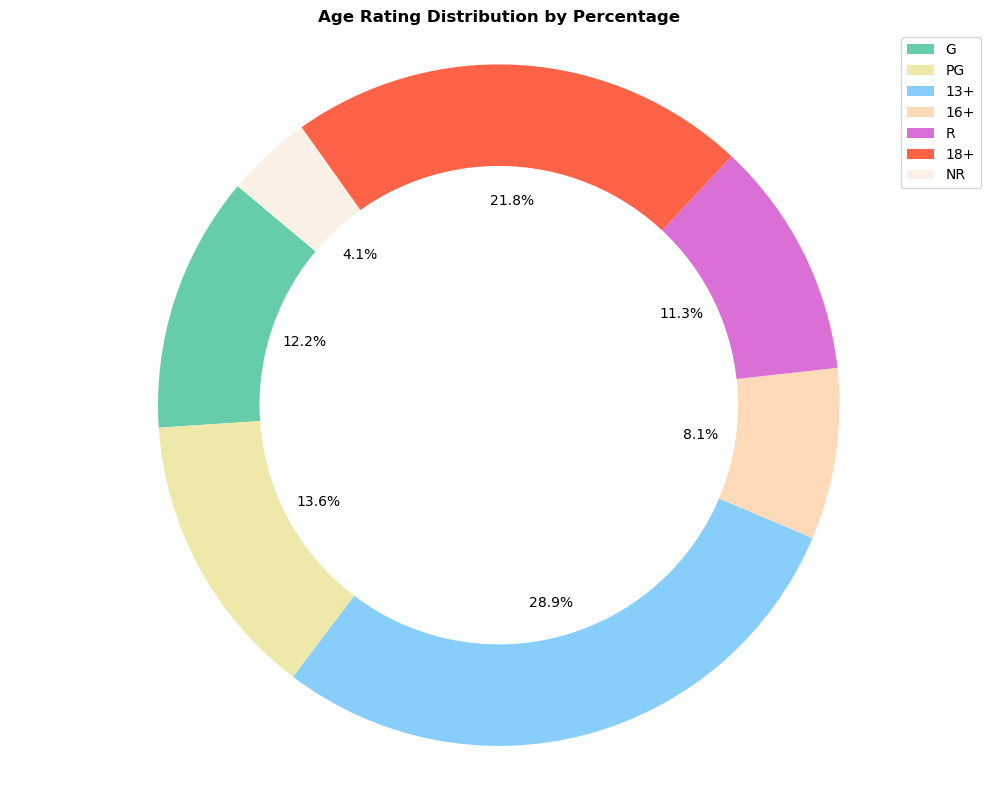

In [11]:
# Count the number of movies for each age rating
movie_counts = df['age_rating'].value_counts()

# Reorder the age ratings
movie_counts = movie_counts.reindex(age_rating_colors.keys())

# Remove NaN values
movie_counts = movie_counts.dropna()

# Plotting
plt.figure(figsize=(20, 8))


# Pie chart
plt.subplot(1, 2, 2)
plt.pie(movie_counts, colors=[age_rating_colors[age_rating] for age_rating in movie_counts.index], autopct='%1.1f%%', startangle=140)
plt.title('Age Rating Distribution by Percentage',fontweight='bold')
plt.legend(movie_counts.index, loc="best")
plt.axis('equal')
# Add a circle at the center to transform the pie chart into a donut chart
circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(circle)

plt.tight_layout()
plt.show()

### Exploratory Visualizations

Here, we present the plots that, while not directly contributing to our primary findings, played a crucial role in our exploratory data analysis. These visualizations helped us navigate through the data, even if they didn't yield the expected insights or were less informative for our specific objectives.

#### Average Revenue vs. Movie Duration

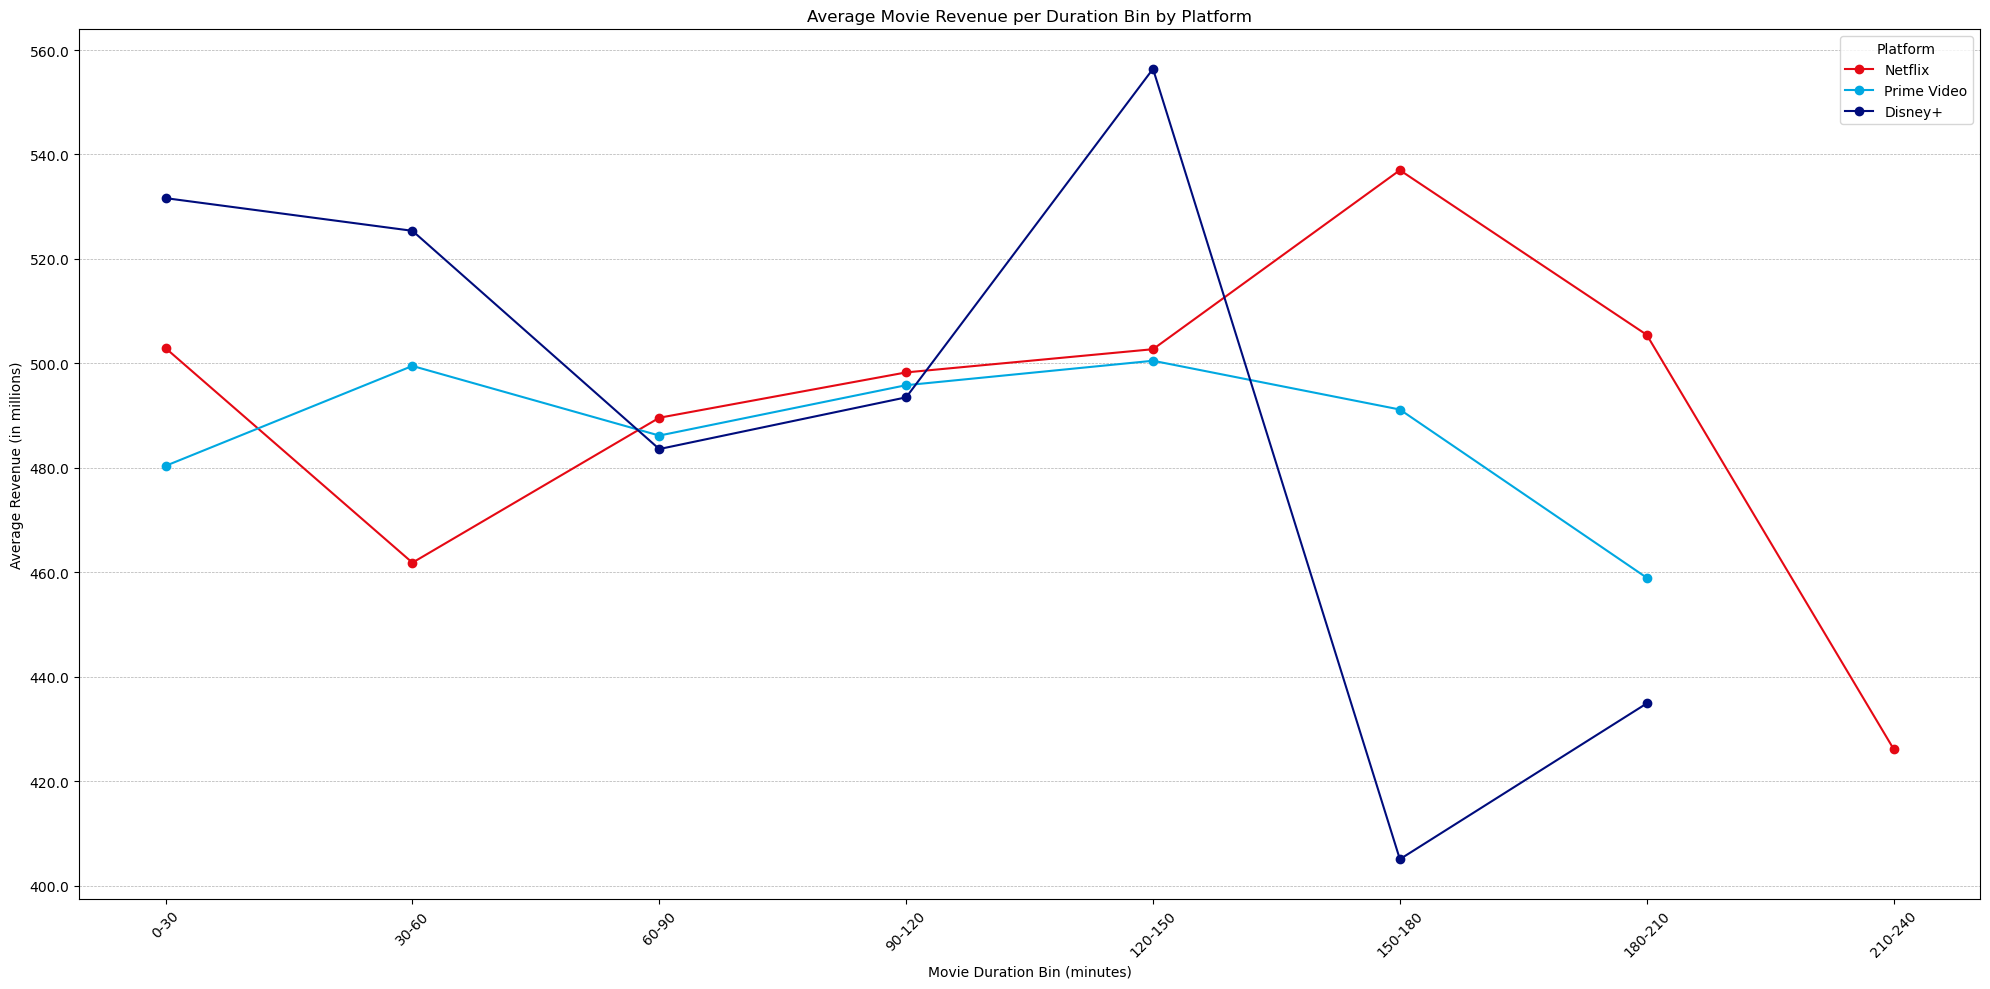

In [12]:
# Function to add duration bins and calculate average revenue
def process_df_for_plotting(df):
    df['duration_bin'] = pd.cut(df['duration_min'], bins=bins, labels=labels, right=False)
    # Note the addition of `observed=True` here to prevent the FutureWarning
    return df.groupby('duration_bin', observed=True)['revenue'].mean().reset_index()

# Define bins for movie durations
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240]
labels = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180-210', '210-240']

# Process each platform's DataFrame
netflix_data = process_df_for_plotting(netflix_df)
prime_video_data = process_df_for_plotting(prime_video_df)
disney_plus_data = process_df_for_plotting(disney_plus_df)

# Define the colors for each platform
platform_colors = ['#E50914', '#00A8E1', '#000c7c']

# Plotting
plt.figure(figsize=(20, 10))
ax = plt.gca()  # Get current axis

# Plot for each platform
for i, platform_data in enumerate([netflix_data, prime_video_data, disney_plus_data]):
    plt.plot(platform_data['duration_bin'], platform_data['revenue'], label=['Netflix', 'Prime Video', 'Disney+'][i], color=platform_colors[i], marker='o')

plt.title('Average Movie Revenue per Duration Bin by Platform')
plt.xlabel('Movie Duration Bin (minutes)')

# Format the y-axis tick labels to show them in millions
scale_factor = 1e6  # for millions
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:.1f}'.format(x / scale_factor) for x in ticks_loc])

# Set the y-axis label to indicate the units are in millions
plt.ylabel('Average Revenue (in millions)')

plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()

# Show the plot
plt.show()

#### Total Revenue vs. Genre

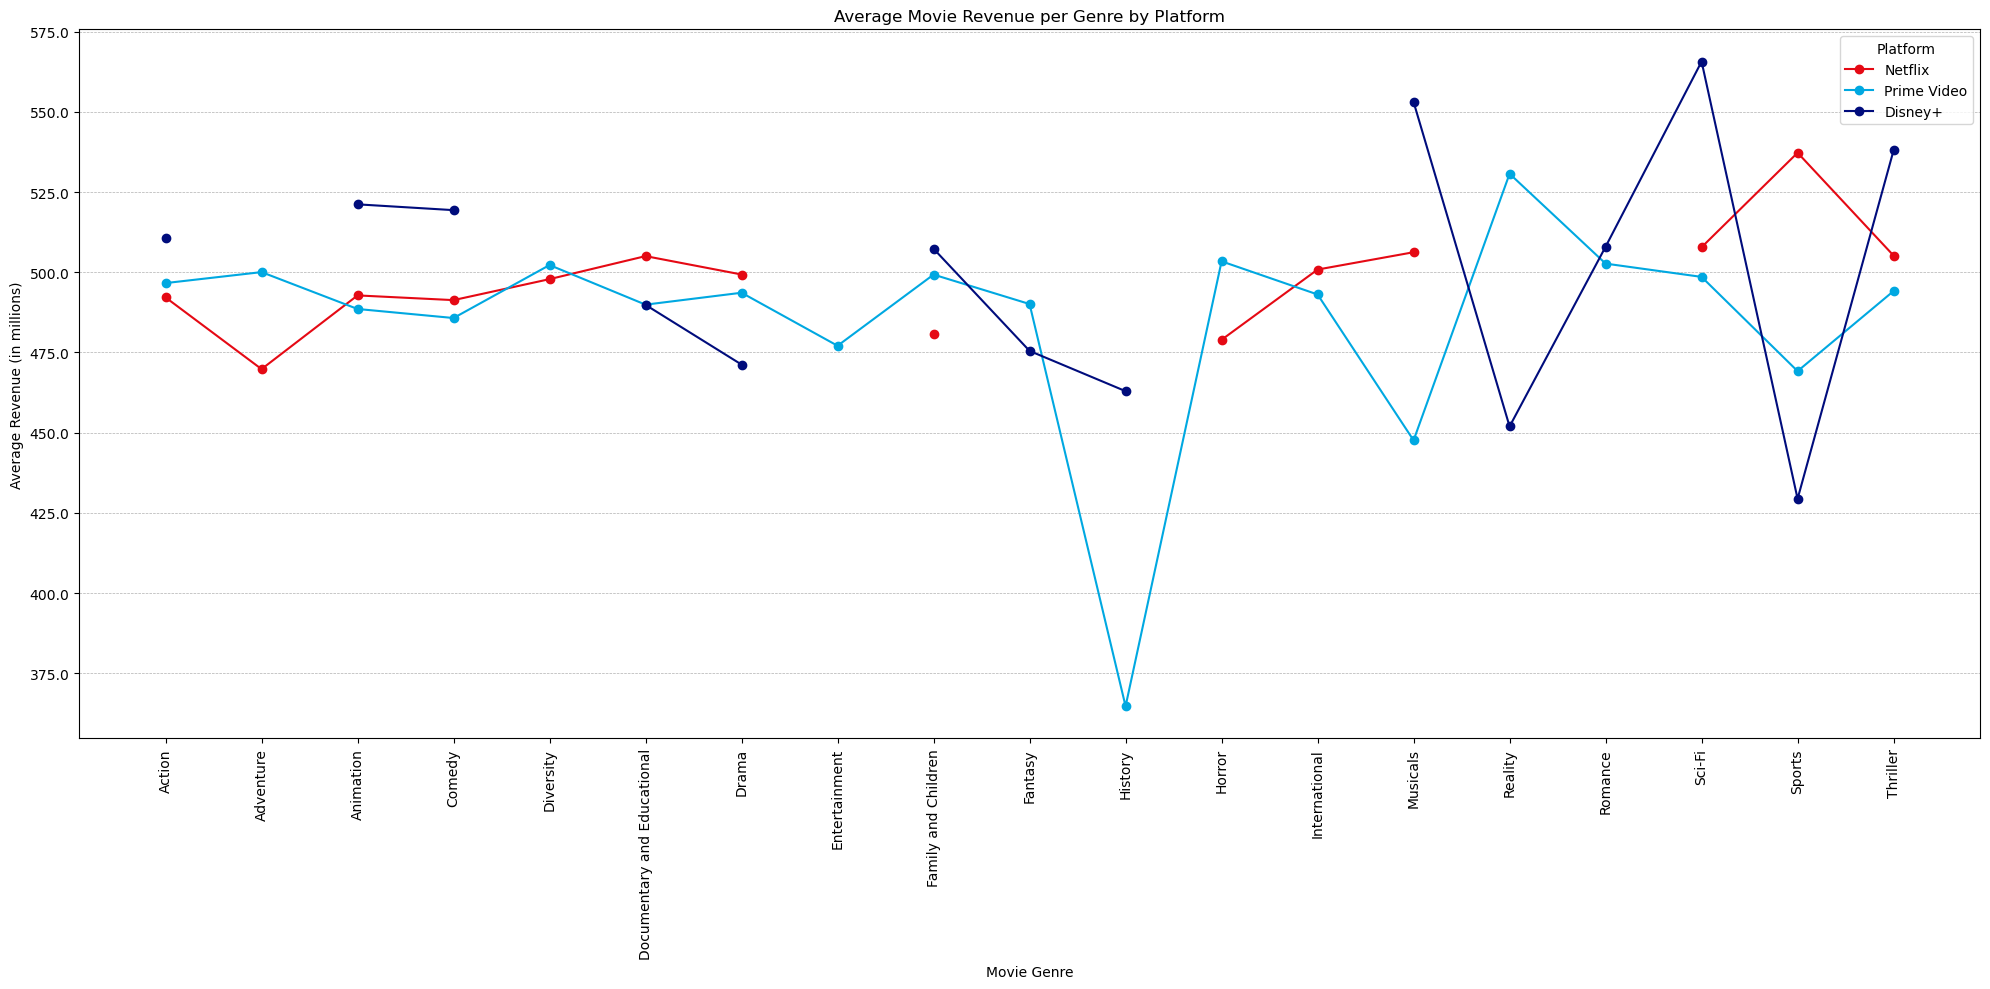

In [13]:
# Function to calculate average revenue per genre and sort genres alphabetically
def process_df_for_genre_revenue(df):
    genre_revenue = df.groupby('genre')['revenue'].mean().reset_index()
    genre_revenue_sorted = genre_revenue.sort_values(by='genre').reset_index(drop=True)
    return genre_revenue_sorted

# Process each platform's DataFrame
netflix_genre_revenue = process_df_for_genre_revenue(netflix_df)
prime_video_genre_revenue = process_df_for_genre_revenue(prime_video_df)
disney_plus_genre_revenue = process_df_for_genre_revenue(disney_plus_df)

# Plotting
plt.figure(figsize=(20, 10))
ax = plt.gca()  # Get current axis

# Ensure all platforms have the same genres in the same order for correct line plotting
all_genres_sorted = sorted(set(netflix_genre_revenue['genre']).union(prime_video_genre_revenue['genre']).union(disney_plus_genre_revenue['genre']))

# Initialize a dictionary to store average revenue for each platform and genre
platform_genre_revenues = {
    'Netflix': [],
    'Prime Video': [],
    'Disney+': []
}

# Calculate average revenue for each genre for each platform
for genre in all_genres_sorted:
    for platform in ['Netflix', 'Prime Video', 'Disney+']:
        if platform == 'Netflix':
            revenue = netflix_genre_revenue[netflix_genre_revenue['genre'] == genre]['revenue'].mean()
        elif platform == 'Prime Video':
            revenue = prime_video_genre_revenue[prime_video_genre_revenue['genre'] == genre]['revenue'].mean()
        else:
            revenue = disney_plus_genre_revenue[disney_plus_genre_revenue['genre'] == genre]['revenue'].mean()
        platform_genre_revenues[platform].append(revenue / 1e6)  # convert to millions

# Plot for each platform
for i, platform in enumerate(['Netflix', 'Prime Video', 'Disney+']):
    plt.plot(all_genres_sorted, platform_genre_revenues[platform], label=platform, color=platform_colors[i], marker='o')

plt.title('Average Movie Revenue per Genre by Platform')
plt.xlabel('Movie Genre')

# Update y-axis to display average revenue
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:.1f}'.format(x) for x in ticks_loc])  # Revenue already in millions from the calculation

# Set the y-axis label to indicate the units are in millions
plt.ylabel('Average Revenue (in millions)')

plt.xticks(rotation=90)
plt.legend(title='Platform')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()

# Show the plot
plt.show()


#### Average Revenue vs. Age Rating

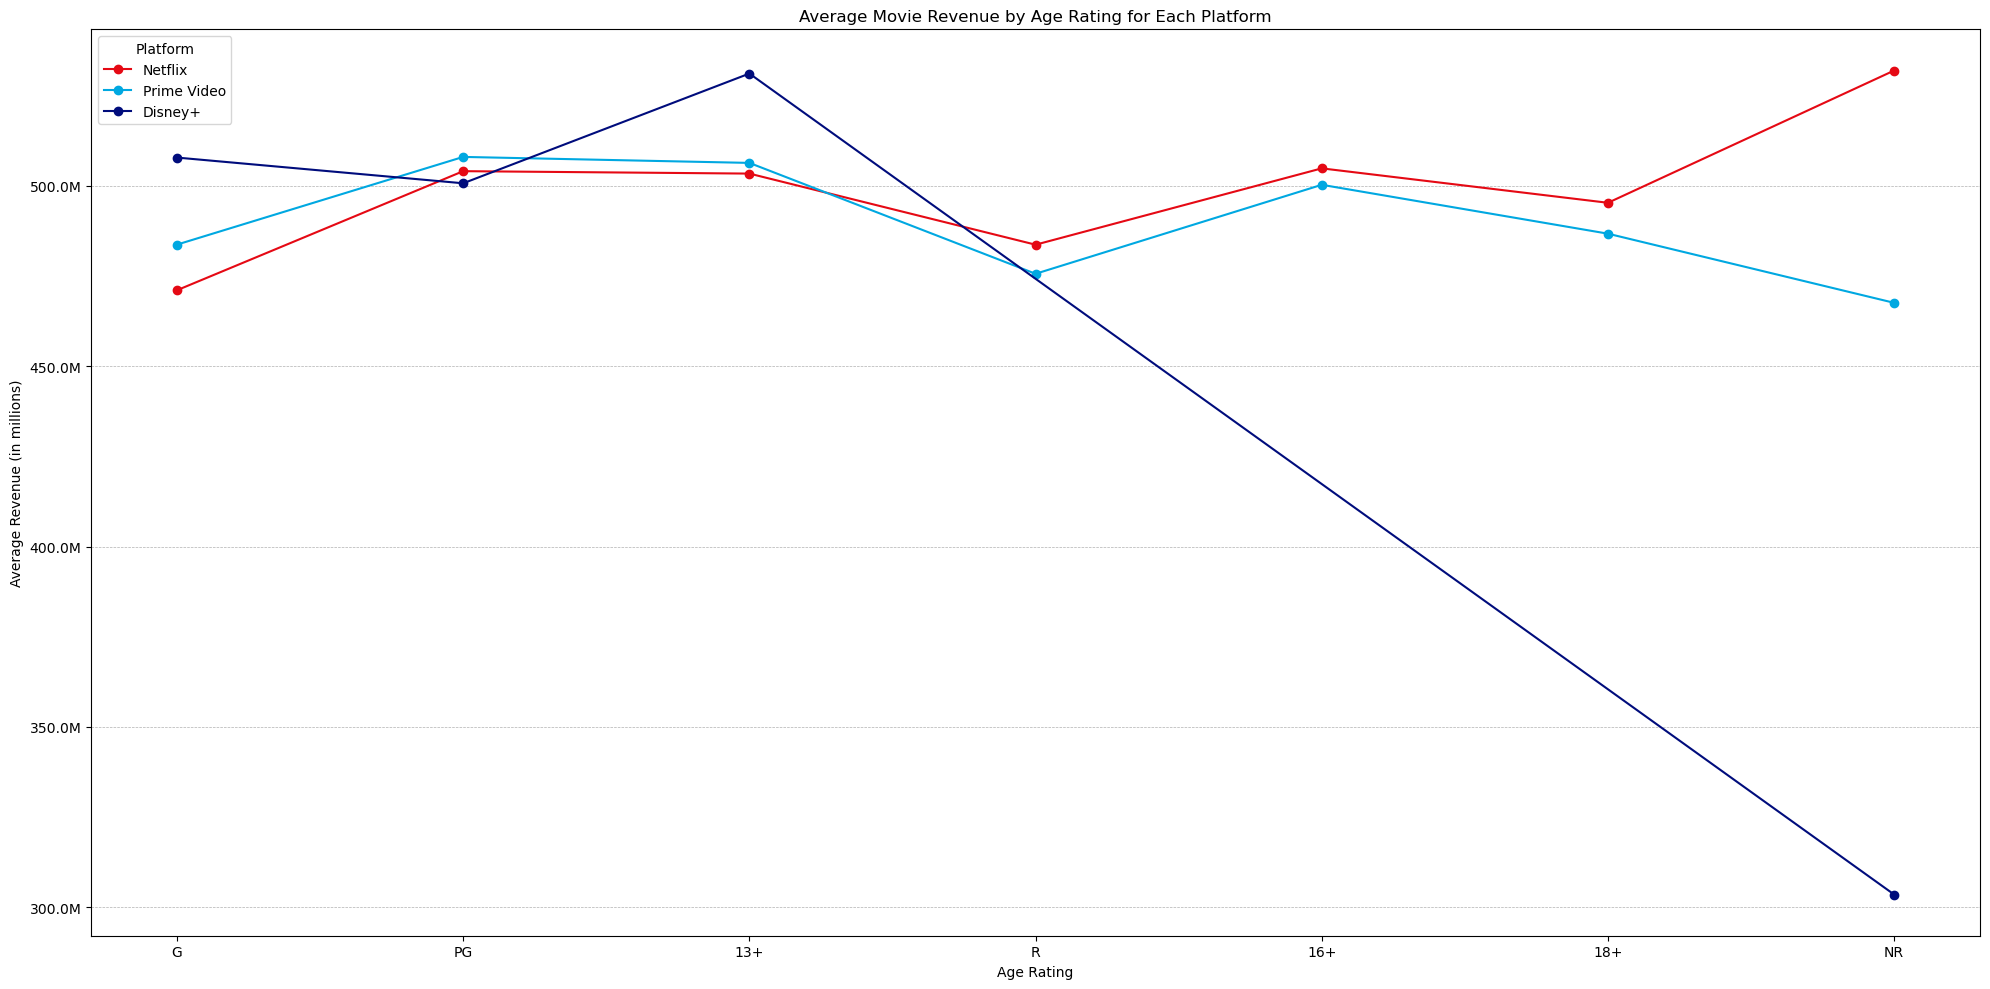

In [14]:
# Define the desired order for the age ratings
age_rating_order = ['G', 'PG', '13+', 'R', '16+', '18+', 'NR']

# Define the colors for each platform
platform_colors = {'Netflix': '#E50914', 'Prime Video': '#00A8E1', 'Disney+': '#000c7c'}

# Function to calculate average revenue per age rating
def process_df_for_age_rating_revenue(df):
    age_rating_revenue = df.groupby('age_rating')['revenue'].mean().reset_index()
    return age_rating_revenue

# Process each platform's DataFrame
netflix_age_rating_revenue = process_df_for_age_rating_revenue(netflix_df)
prime_video_age_rating_revenue = process_df_for_age_rating_revenue(prime_video_df)
disney_plus_age_rating_revenue = process_df_for_age_rating_revenue(disney_plus_df)

# Plotting
plt.figure(figsize=(20, 10))
ax = plt.gca()  # Get current axis

# Function to plot data for a single platform
def plot_age_rating_revenue(platform_data, platform_name, color):
    x_values = []
    y_values = []
    for age_rating in age_rating_order:
        if age_rating in platform_data['age_rating'].values:
            revenue = platform_data[platform_data['age_rating'] == age_rating]['revenue'].mean()
            x_values.append(age_rating)
            y_values.append(revenue / 1e6)  # Convert to millions
    plt.plot(x_values, y_values, label=platform_name, color=color, marker='o', linestyle='-')  # Draw line with dots

# Plot for each platform
plot_age_rating_revenue(netflix_age_rating_revenue, 'Netflix', platform_colors['Netflix'])
plot_age_rating_revenue(prime_video_age_rating_revenue, 'Prime Video', platform_colors['Prime Video'])
plot_age_rating_revenue(disney_plus_age_rating_revenue, 'Disney+', platform_colors['Disney+'])

plt.title('Average Movie Revenue by Age Rating for Each Platform')
plt.xlabel('Age Rating')
plt.ylabel('Average Revenue (in millions)')

# Set the x-axis to display the predefined age ratings in order
plt.xticks(age_rating_order)

# Update y-axis to display average revenue in millions
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:.1f}M'.format(x) for x in ticks_loc])

plt.legend(title='Platform')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()

# Show the plot
plt.show()


#### Movie Duration vs. Genre

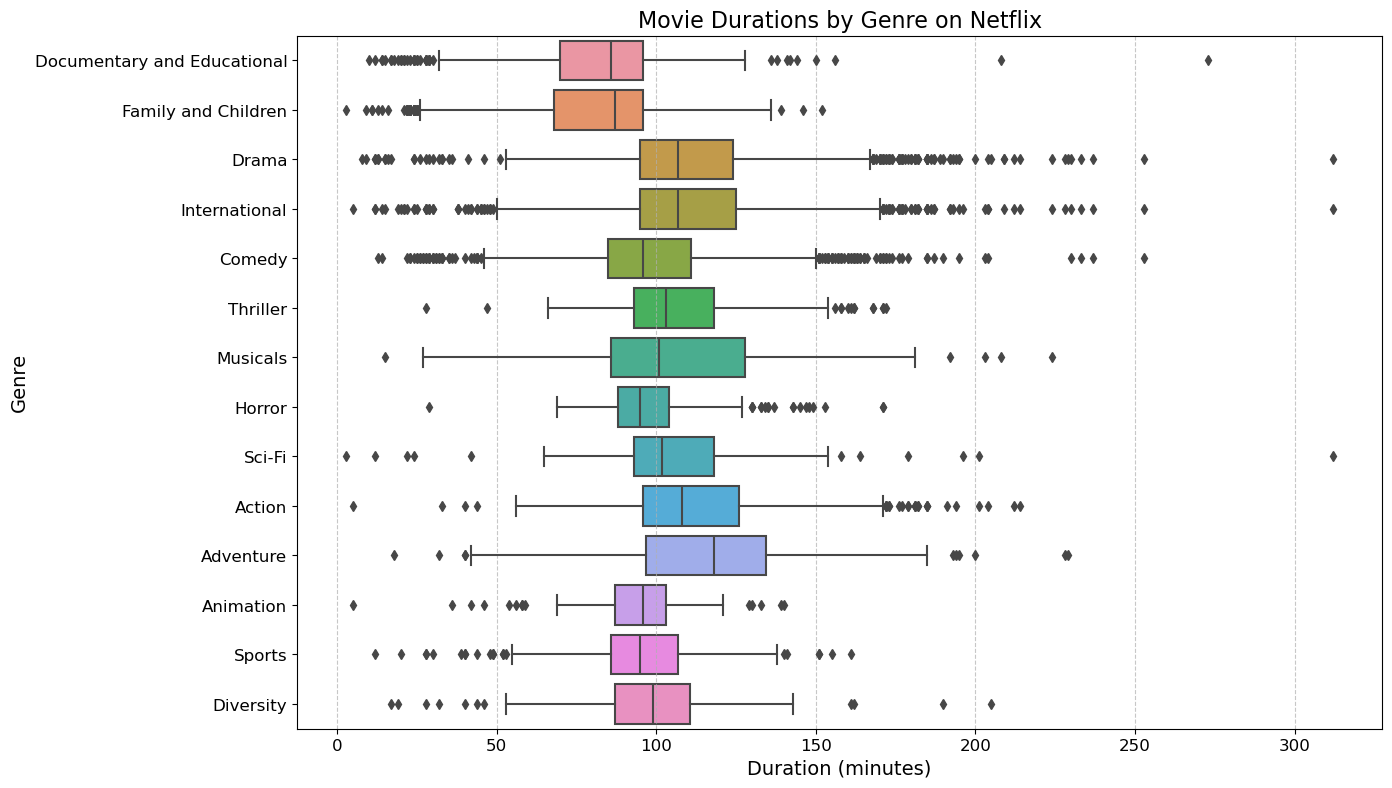

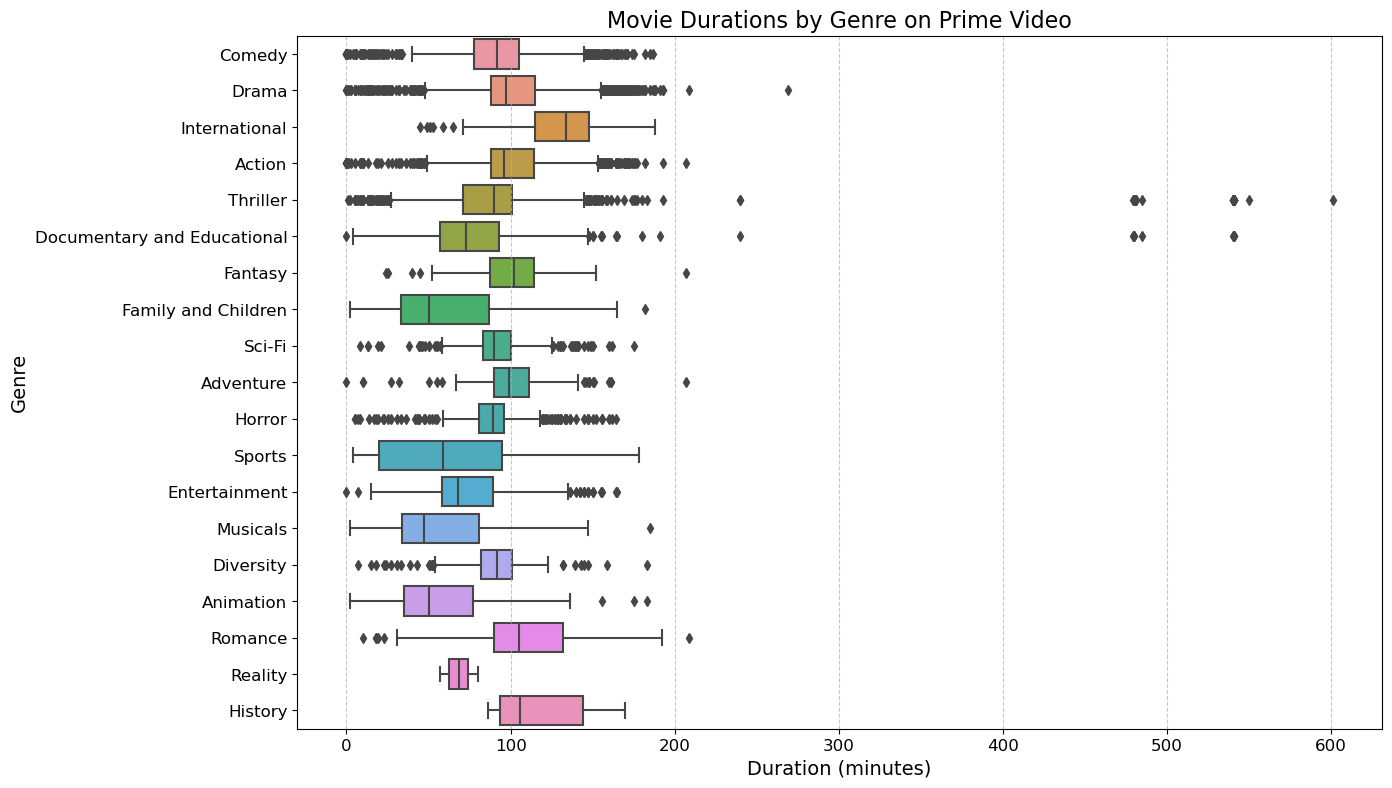

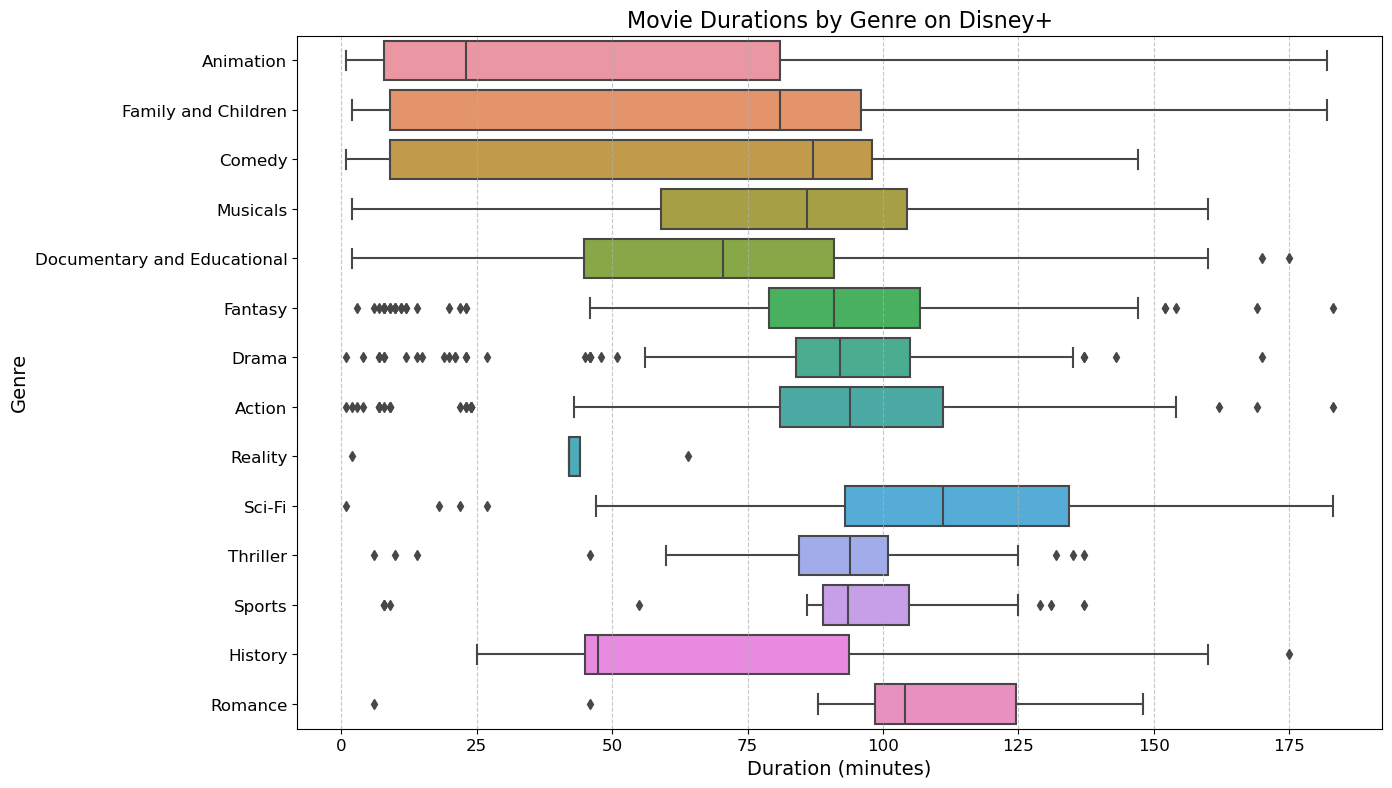

In [15]:
def create_box_plot_for_platform(df, platform_name):
    plt.figure(figsize=(14, 9))
    sns.boxplot(data=df, y='genre', x='duration_min')
    plt.title(f'Movie Durations by Genre on {platform_name}', fontsize=16)
    plt.xlabel('Duration (minutes)', fontsize=14)
    plt.ylabel('Genre', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

create_box_plot_for_platform(netflix_df, 'Netflix')
create_box_plot_for_platform(prime_video_df, 'Prime Video')
create_box_plot_for_platform(disney_plus_df, 'Disney+')

#### Movie Duration vs. Revenue

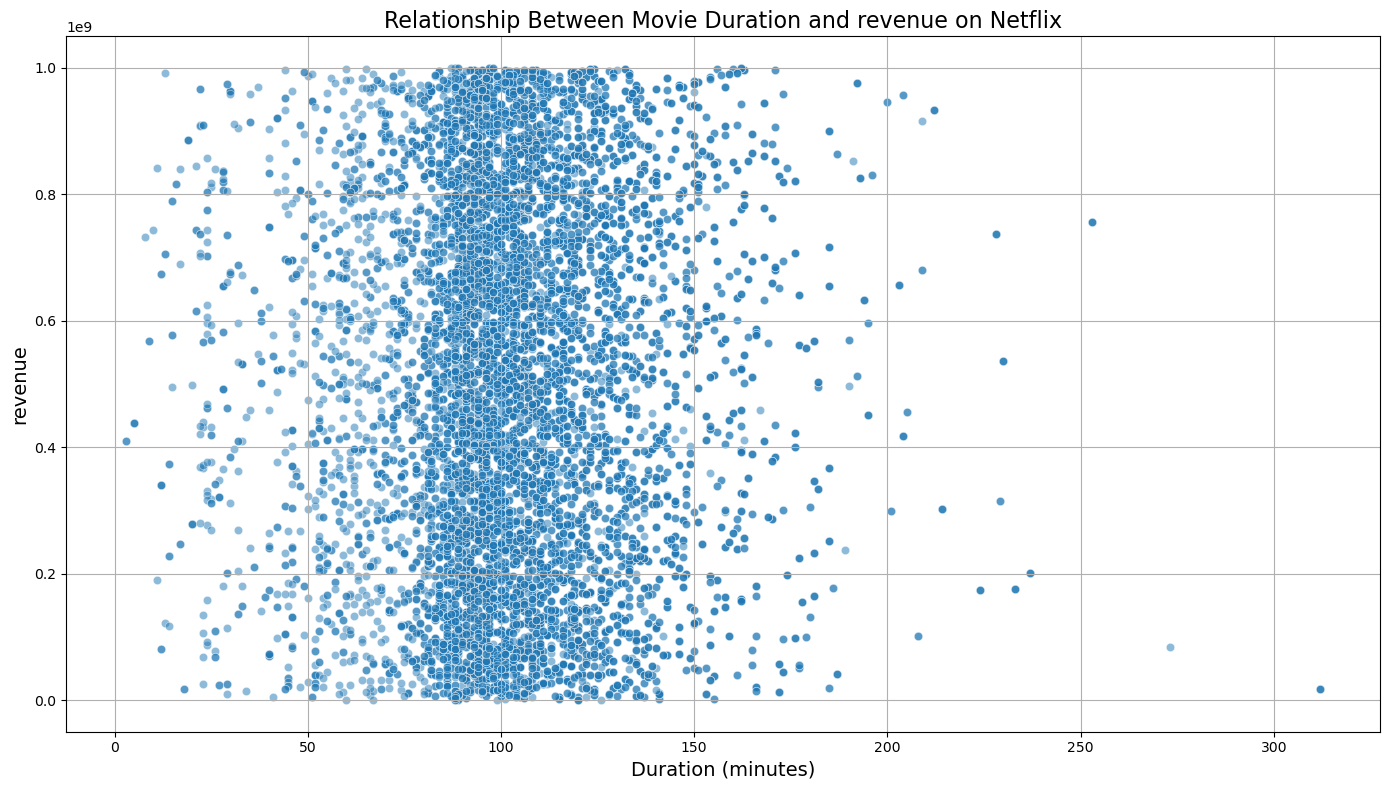

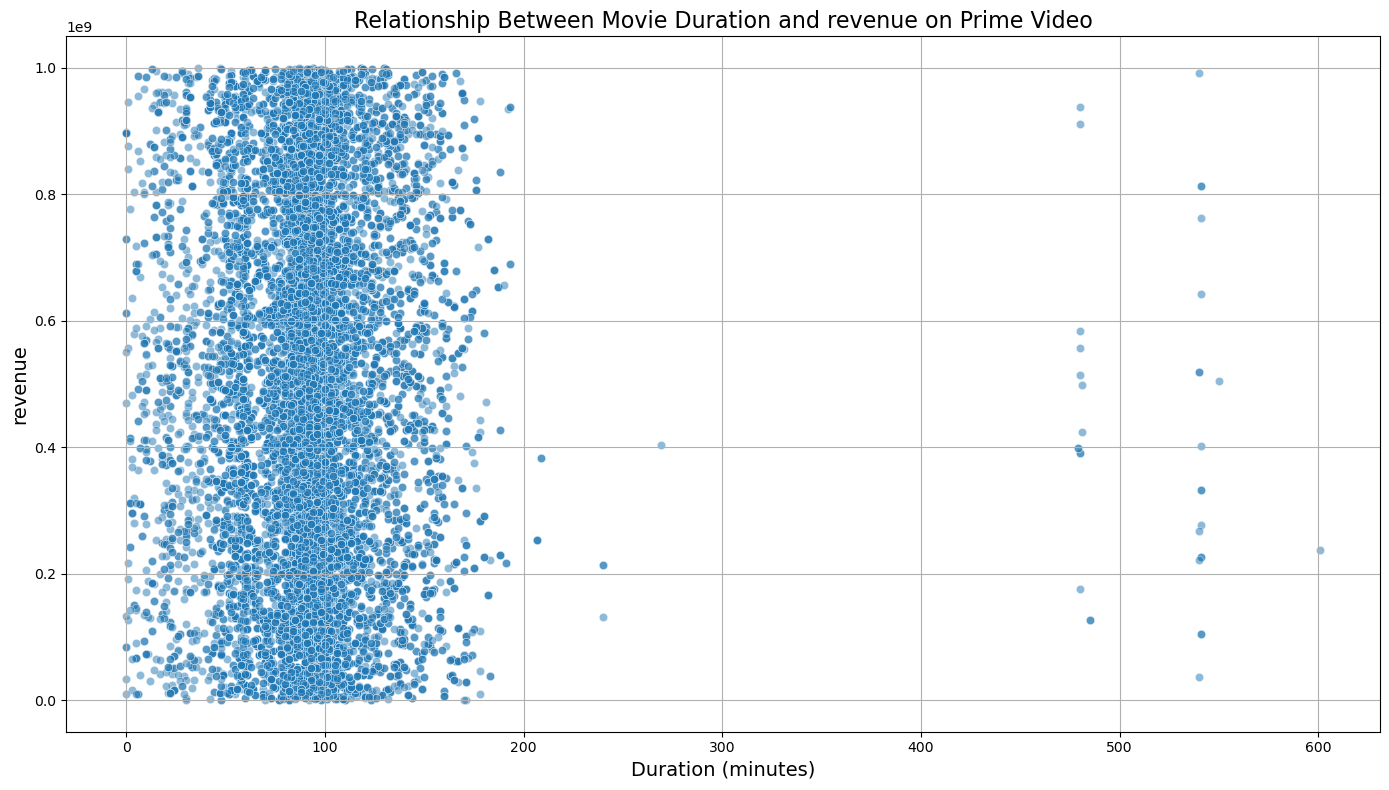

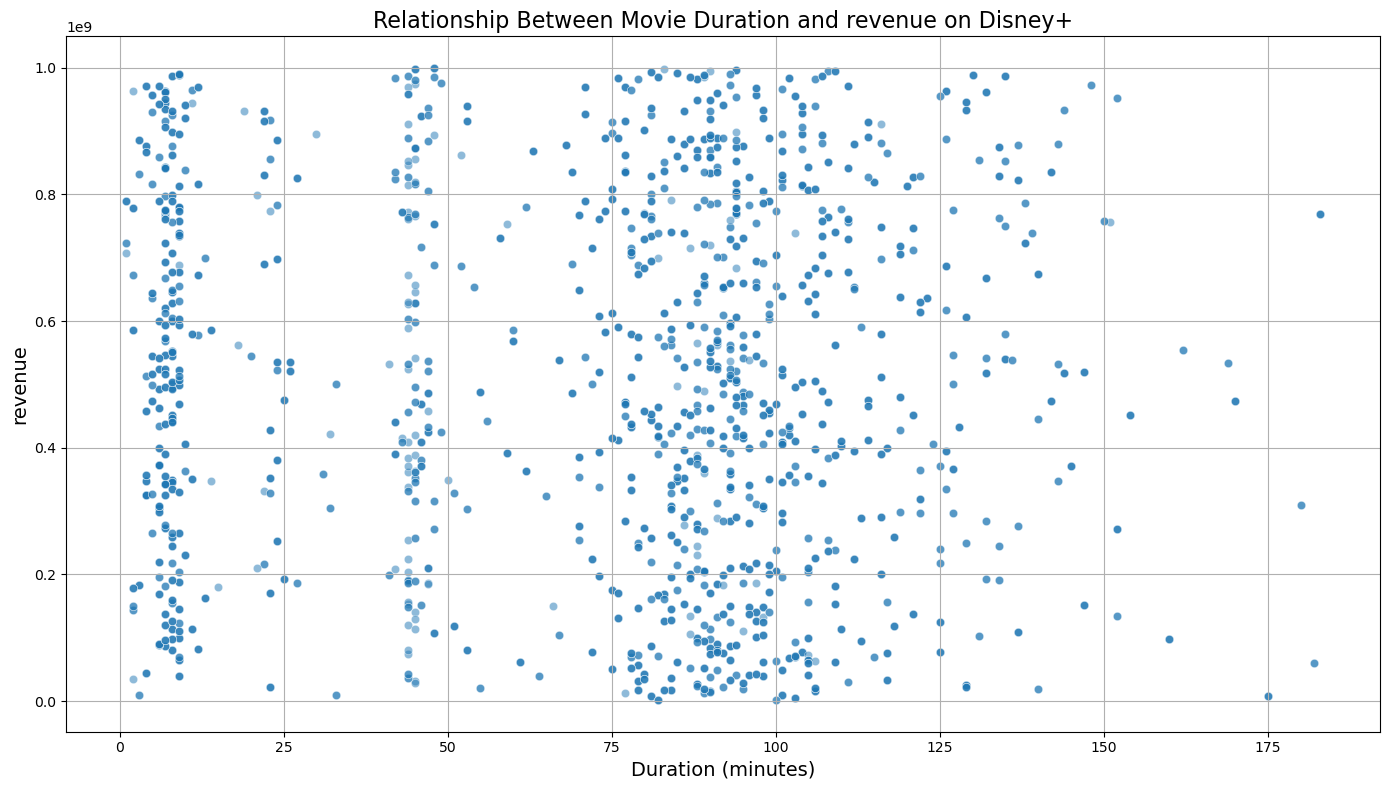

In [16]:
# Function to create a scatter plot showing the relationship between movie duration and revenue for a specific platform
def plot_duration_vs_revenue_for_platform(df, platform_name):
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=df, x='duration_min', y='revenue', alpha=0.5)
    plt.title(f'Relationship Between Movie Duration and revenue on {platform_name}', fontsize=16)
    plt.xlabel('Duration (minutes)', fontsize=14)
    plt.ylabel('revenue', fontsize=14)
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
    plt.show()

# Create plots for each platform
plot_duration_vs_revenue_for_platform(netflix_df, 'Netflix')
plot_duration_vs_revenue_for_platform(prime_video_df, 'Prime Video')
plot_duration_vs_revenue_for_platform(disney_plus_df, 'Disney+')

#### Revenue vs. Platform

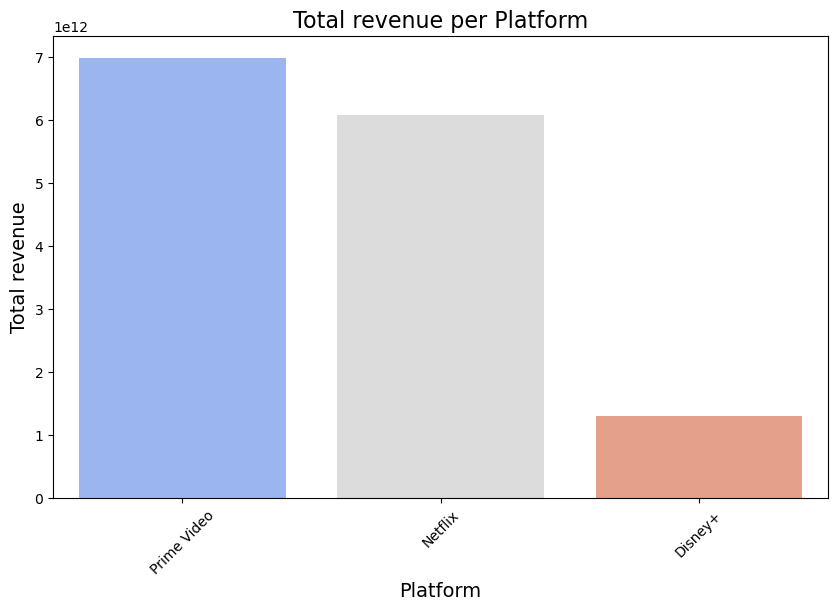

In [17]:
# Calculate the total revenue per platform
total_revenue_per_platform = df.groupby('platform')['revenue'].sum().reset_index()

# Sort platforms by total revenue for better visualization
total_revenue_per_platform = total_revenue_per_platform.sort_values('revenue', ascending=False)

# Create a bar plot for total revenue per platform
plt.figure(figsize=(10, 6))
sns.barplot(data=total_revenue_per_platform, x='platform', y='revenue', palette='coolwarm')
plt.title('Total revenue per Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total revenue', fontsize=14)
plt.xticks(rotation=45)  # Rotate platform names for better readability
plt.show()

## Machine Learning Model:

### Platform Prediction

This section details our process for developing a machine learning model that predicts the optimal streaming platform for a given movie, ensuring the best possible audience reach and engagement.

In [18]:
# Load the dataset
# Change path if necessary
df = pd.read_csv(r'https://raw.githubusercontent.com/ulquyorra-11/Cinemalytics/5da1bd9f3c477cf9c5337f0881c5eeefb3e4115b/data/clean/updated_clean_combined_movies.csv')

# Encode 'genre' and 'age_rating' using LabelEncoder
label_encoder_genre = LabelEncoder()
df['genre_encoded'] = label_encoder_genre.fit_transform(df['genre'])

label_encoder_age_rating = LabelEncoder()
df['age_rating_encoded'] = label_encoder_age_rating.fit_transform(df['age_rating'])

label_encoder_platform = LabelEncoder()
df['platform_encoded'] = label_encoder_platform.fit_transform(df['platform'])

# Select features and target variable for the model
X = df[['genre_encoded', 'duration_min', 'age_rating_encoded']]
y = df['platform_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Create directory to save models and encoders
os.makedirs(r'trained_models')

# Save the trained model
dump(clf, r'trained_models/random_forest_model.joblib')

# Save the label encoders
dump(label_encoder_genre, r'trained_models/genre_encoder.joblib')
dump(label_encoder_age_rating, r'trained_models/age_rating_encoder.joblib')
dump(label_encoder_platform, r'trained_models/platform_encoder.joblib')


# Test the trained model
'''
# Predict on the test set and evaluate the model's accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Gather user input
genre_input = input("Enter the movie's genre: ")
duration_input = int(input("Enter the movie's duration in minutes: "))
age_rating_input = input("Enter the movie's age rating: ")

# Transform inputs using the fitted LabelEncoders
try:
    genre_encoded = label_encoder_genre.transform([genre_input])[0]
    age_rating_encoded = label_encoder_age_rating.transform([age_rating_input])[0]
except ValueError as e:
    print(f"Error: {e}. Please ensure your inputs match the dataset's categories.")
    exit()

# Create DataFrame for the new movie
new_movie = pd.DataFrame({'genre_encoded': [genre_encoded], 'duration_min': [duration_input], 'age_rating_encoded': [age_rating_encoded]})

# Use the trained classifier to predict the best platform
predicted_platform_encoded = clf.predict(new_movie)
predicted_platform = label_encoder_platform.inverse_transform(predicted_platform_encoded)

print(f'Accuracy on the test set: {accuracy:.4f}')
print(f'Best Platform for the new movie: {predicted_platform[0]}')
'''

'\n# Predict on the test set and evaluate the model\'s accuracy\ny_pred = clf.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\n\n# Gather user input\ngenre_input = input("Enter the movie\'s genre: ")\nduration_input = int(input("Enter the movie\'s duration in minutes: "))\nage_rating_input = input("Enter the movie\'s age rating: ")\n\n# Transform inputs using the fitted LabelEncoders\ntry:\n    genre_encoded = label_encoder_genre.transform([genre_input])[0]\n    age_rating_encoded = label_encoder_age_rating.transform([age_rating_input])[0]\nexcept ValueError as e:\n    print(f"Error: {e}. Please ensure your inputs match the dataset\'s categories.")\n    exit()\n\n# Create DataFrame for the new movie\nnew_movie = pd.DataFrame({\'genre_encoded\': [genre_encoded], \'duration_min\': [duration_input], \'age_rating_encoded\': [age_rating_encoded]})\n\n# Use the trained classifier to predict the best platform\npredicted_platform_encoded = clf.predict(new_movie)\npredicted_platform 

### Revenue Prediction

This section explains our approach to creating a model capable of estimating the potential revenue a movie could generate on the recommended streaming platform

In [19]:
# Load the dataset
# Change path if necessary
df = pd.read_csv(r'https://raw.githubusercontent.com/ulquyorra-11/Cinemalytics/5da1bd9f3c477cf9c5337f0881c5eeefb3e4115b/data/clean/updated_clean_combined_movies.csv')

# Encode 'genre' and 'age_rating' using LabelEncoder
label_encoder_genre = LabelEncoder()
df['genre_encoded'] = label_encoder_genre.fit_transform(df['genre'])

label_encoder_age_rating = LabelEncoder()
df['age_rating_encoded'] = label_encoder_age_rating.fit_transform(df['age_rating'])

label_encoder_platform = LabelEncoder()
df['platform_encoded'] = label_encoder_platform.fit_transform(df['platform'])

# Select features and target variable for the model
X = df[['genre_encoded', 'duration_min', 'age_rating_encoded', 'platform_encoded']]  # Include 'revenue' as a feature
y = df['revenue']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Save the trained model
joblib.dump(regressor, r'trained_models/random_forest_regressor_with_revenue.joblib')


# Test the trained model
'''
# Predict on the test set and evaluate the model's performance
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error

print(f'Mean Squared Error on the test set: {mse:.4f}')


platform_input = predicted_platform

# Transform inputs using the fitted LabelEncoders
platform_encoded = label_encoder_platform.transform([platform_input])[0]

# Create DataFrame for the new movie
new_movie = pd.DataFrame({'genre_encoded': [genre_encoded], 'duration_min': [duration_input], 'age_rating_encoded': [age_rating_encoded], 'platform_encoded': [platform_encoded]})

# Use the trained regressor to predict the revenue
predicted_revenue = regressor.predict(new_movie)

print(f'Predicted Revenue for the new movie: {predicted_revenue[0]}')
'''

"\n# Predict on the test set and evaluate the model's performance\ny_pred = regressor.predict(X_test)\nmse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error\n\nprint(f'Mean Squared Error on the test set: {mse:.4f}')\n\n\nplatform_input = predicted_platform\n\n# Transform inputs using the fitted LabelEncoders\nplatform_encoded = label_encoder_platform.transform([platform_input])[0]\n\n# Create DataFrame for the new movie\nnew_movie = pd.DataFrame({'genre_encoded': [genre_encoded], 'duration_min': [duration_input], 'age_rating_encoded': [age_rating_encoded], 'platform_encoded': [platform_encoded]})\n\n# Use the trained regressor to predict the revenue\npredicted_revenue = regressor.predict(new_movie)\n\nprint(f'Predicted Revenue for the new movie: {predicted_revenue[0]}')\n"

## User Interface Integration

In this section, we introduce our user-friendly graphical interface, which integrates our machine learning models to offer users personalized recommendations. By inputting details about their movie—such as genre, age rating, and duration—users can receive predictions on the most suitable platform for their content and an estimate of potential revenue.

In [20]:
def load_data():
    # Change path if necessary
    dataset_path = r'https://raw.githubusercontent.com/ulquyorra-11/Cinemalytics/5da1bd9f3c477cf9c5337f0881c5eeefb3e4115b/data/clean/updated_clean_combined_movies.csv'
    return pd.read_csv(dataset_path)

def process_data(df):
    df['genre'] = df['genre'].astype(str).str.split(',')
    exploded_genres = df.explode('genre')
    exploded_genres['genre'] = exploded_genres['genre'].str.strip()
    unique_genres = sorted(exploded_genres['genre'][exploded_genres['genre'] != 'nan'].unique())
    unique_age_ratings = sorted(df['age_rating'].dropna().unique())
    return unique_genres, unique_age_ratings

def load_image(path, size=None):
    image = Image.open(path)
    if size:
        image = image.resize(size, Image.Resampling.LANCZOS)
    return ImageTk.PhotoImage(image)

# Global variables for image paths and labels
# Change path if necessary
APP_LOGO_PATH = 'images/cinemalytics_nobackground.png'
PLATFORM_LOGOS = {
    'Netflix': 'images/thumbnail_netflix_shadow.png',
    'Prime Video': 'images/thumbnail_prime_video_shadow.png',
    'Disney+': 'images/thumbnail_disney_plus_shadow.png',
}

# Global variables
df = load_data()
unique_genres, unique_age_ratings = process_data(df)
clf = load('trained_models/random_forest_model.joblib')
clf_regressor = load('trained_models/random_forest_regressor_with_revenue.joblib')
label_encoder_genre = load('trained_models/genre_encoder.joblib')
label_encoder_age_rating = load('trained_models/age_rating_encoder.joblib')
label_encoder_platform = load('trained_models/platform_encoder.joblib')
label_encoders = (label_encoder_genre, label_encoder_age_rating, label_encoder_platform)

def fade_out(root):
    try:
        alpha = root.attributes("-alpha")
        while alpha > 0:
            alpha -= 0.05  # Decrease the opacity by 5%
            root.attributes("-alpha", alpha)
            root.update()
            time.sleep(0.05)  # Wait for 25ms
    except tk.TclError:
        return  # Break out of the loop if the window has been destroyed

    root.destroy()

def fade_in(root):
    try:
        alpha = 0
        root.attributes("-alpha", alpha)
        while alpha < 1:
            alpha += 0.05  # Increase the opacity by 5%
            new_alpha = min(alpha, 0.9)  # Ensure that the max opacity is 90%
            root.attributes("-alpha", new_alpha)
            root.update()
            time.sleep(0.05)  # Wait for 25ms
    except tk.TclError:
        return  # Break out of the loop if the window has been destroyed

# Function to center the window
def center_window(root, width=900, height=500):
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    center_x = int(screen_width/2 - width/2)
    center_y = int(screen_height/2 - height/2)
    root.geometry(f'{width}x{height}+{center_x}+{center_y}')

def start_window():
    root = tk.Tk()
    center_window(root, width=900, height=500)
    root.title("Cinemalytics")

    canvas = tk.Canvas(root, width=900, height=500)
    canvas.pack(fill="both", expand=True)

    # Load and place the logo image on the Canvas
    app_logo_image = load_image(APP_LOGO_PATH, size=(200, 200))
    canvas.create_image(450, 150, image=app_logo_image, anchor='center')

    # Define a larger font for the project title
    project_title_font = font.Font(size=24, family='Helvetica', weight='bold')

    # Slightly lower the project title's position below the logo on the canvas
    project_title_label = tk.Label(root, text="Cinemalytics: Empowering Your Vision with Insights", font=project_title_font)
    canvas.create_window(450, 350, window=project_title_label, anchor='center')

    # Style for the Start button
    style = ttk.Style()
    style.configure("TButton", borderwidth=1, bordercolor="black", background="#d9d9d9", font=('Helvetica', 14), padding=6)

    # Place the Start button at the bottom
    start_button = ttk.Button(root, text="Start", command=lambda: platform_window(root), style="TButton")
    canvas.create_window(450, 450, window=start_button, anchor='center')

    # Keep references to the images and widgets to prevent garbage collection
    canvas.app_logo_image = app_logo_image
    canvas.project_title_label = project_title_label

    fade_in(root)
    root.mainloop()


def platform_window(previous_root):
    previous_root.destroy()
    root = tk.Tk()
    center_window(root)
    root.title("Platform Prediction")

    # Configure the style for the TButton to be grey
    style = ttk.Style()
    style.configure("TButton", borderwidth=1, bordercolor="black", background="#d9d9d9", font=('Helvetica', 14), padding=6)

    # Load and place the logo image on the Canvas
    app_logo_image = load_image(APP_LOGO_PATH, size=(200, 200))
    logo_label = tk.Label(root, image=app_logo_image)
    logo_label.image = app_logo_image
    logo_label.grid(row=0, column=0, columnspan=2, padx=20, pady=20)

    genre_var = tk.StringVar()
    age_rating_var = tk.StringVar()
    duration_var = tk.StringVar()

    tk.Label(root, text="Genre:").grid(row=1, column=0, padx=10, pady=5)
    genre_combobox = ttk.Combobox(root, textvariable=genre_var, values=unique_genres)
    genre_combobox.grid(row=1, column=1, padx=10, pady=5)

    tk.Label(root, text="Age Rating:").grid(row=2, column=0, padx=10, pady=5)
    age_rating_combobox = ttk.Combobox(root, textvariable=age_rating_var, values=unique_age_ratings)
    age_rating_combobox.grid(row=2, column=1, padx=10, pady=5)

    tk.Label(root, text="Duration (min):").grid(row=3, column=0, padx=10, pady=5)
    duration_entry = tk.Entry(root, textvariable=duration_var)
    duration_entry.grid(row=3, column=1, padx=10, pady=5)
    predict_button = ttk.Button(root, text="Predict Platform", command=lambda: validate_and_predict(root, genre_var.get(), duration_var.get(), age_rating_var.get()), style="TButton")
    predict_button.grid(row=4, column=0, columnspan=2, pady=10)

    for i in range(5):
        root.grid_rowconfigure(i, weight=1)
    for j in range(2):
        root.grid_columnconfigure(j, weight=1)

    fade_in(root)
    root.mainloop()

def validate_and_predict(root, genre_input, duration_input, age_rating_input):
    # Check if any of the required fields is empty
    if not genre_input.strip() or not duration_input.strip() or not age_rating_input.strip():
        messagebox.showerror("Input Error", "Please fill out all fields.")
        return

    # Try converting the duration input to an integer to check if it's a valid number
    try:
        duration = int(duration_input)
    except ValueError:
        messagebox.showerror("Input Error", "Please enter a valid number for duration.")
        return

    # If both checks pass, then call the predict_platform function
    predict_platform(root, genre_input, duration, age_rating_input)

def predict_platform(previous_root, genre_input, duration_input, age_rating_input):
    if not genre_input or not duration_input or not age_rating_input:
        messagebox.showerror("Input Error", "All fields are required.")
        return

    try:
        duration = int(duration_input)
        genre_encoded = label_encoder_genre.transform([genre_input])[0]
        age_rating_encoded = label_encoder_age_rating.transform([age_rating_input])[0]
        input_features = pd.DataFrame({
            'genre_encoded': [genre_encoded],
            'duration_min': [duration],
            'age_rating_encoded': [age_rating_encoded]
        })
        predicted_platform_encoded = clf.predict(input_features)
        predicted_platform = label_encoder_platform.inverse_transform(predicted_platform_encoded)[0]

        input_features['platform_encoded'] = predicted_platform_encoded
        predicted_revenue = clf_regressor.predict(input_features)[0]

        previous_root.destroy()
        result_window(predicted_platform, predicted_revenue, genre_input, age_rating_input, duration_input)

    except ValueError as e:
        messagebox.showerror("Input Error", f"Please ensure all inputs are correctly formatted.\n{e}")
    except Exception as e:
        messagebox.showerror("Prediction Error", f"An error occurred during prediction.\n{e}")

def result_window(platform, predicted_revenue, genre, age_rating, duration):
    root = tk.Tk()
    center_window(root, width=900, height=500)
    root.title(f"{platform} Prediction")

    # Background colors for each platform
    background_colors = {
        'Netflix': '#e4101f',
        'Prime Video': '#00A8E1',
        'Disney+': '#0a8393',
    }

    # Get the background color for the predicted platform, default to a neutral color if not found
    bg_color = background_colors.get(platform, "#ffffff")

    # Apply the background color to the window
    root.configure(bg=bg_color)

    # Define font styles
    large_font = font.Font(size=16, family='Helvetica')  # Normal font
    bold_font = font.Font(size=16, family='Helvetica', weight='bold')  # Bold font for labels

    # Configure the grid
    root.grid_columnconfigure(0, weight=1)
    root.grid_columnconfigure(1, weight=0, minsize=200)  # This column will contain the logo
    root.grid_columnconfigure(2, weight=3)  # This column will contain the text message

    # Load and place the logo image on the Canvas
    app_logo_image = load_image(APP_LOGO_PATH, size=(150, 150))
    app_logo_label = tk.Label(root, image=app_logo_image, bg=bg_color)
    app_logo_label.image = app_logo_image
    app_logo_label.grid(row=0, column=0, columnspan=3, pady=20)

    logo_path = PLATFORM_LOGOS.get(platform)
    if logo_path:
        logo_image = load_image(logo_path, size=(200, 200))
        logo_label = tk.Label(root, image=logo_image, bg=bg_color)
        logo_label.image = logo_image
        logo_label.grid(row=1, column=1, padx=20, sticky='nsew')

    message_text = (
        f"Genre: {genre}\n\nAge Rating: {age_rating}\n\nDuration: {duration} minutes\n\n"
        f"Recommendation: {platform}\n\nPredicted Revenue: ${predicted_revenue:,.2f}"
    )
    message_label = tk.Label(root, text=message_text, font=large_font, justify='left', anchor='n', bg=bg_color, fg="white")
    message_label.grid(row=1, column=2, padx=(20, 20), pady=(20, 20), sticky='nsew')

    # Apply the styled 'TButton' to the back button
    back_button = ttk.Button(root, text="Back to Start", command=lambda: restart_app(root), style="TButton")
    back_button.grid(row=2, column=0, columnspan=3, pady=(20, 40))

    fade_in(root)
    root.mainloop()

def restart_app(current_root):
    fade_out(current_root)
    start_window()


if __name__ == "__main__":
    start_window()

## Results:

Throughout the Cinemalytics project, we have achieved several key milestones:

- **Enhanced Dataset**: We managed to create and maintain a clean dataset that can be expanded in the future for deeper insights.
- **Accurate ML Models**: Developed precise machine learning models for predicting the most suitable platform and potential revenue for movies.
- **User-Friendly Interface**: Implemented an easy-to-use interface, making our models accessible to users for practical applications.
- **Pilot Product**: Created a pilot version of our product, ready for deployment and further iteration in subsequent versions.
- **Comprehensive Documentation**: Ensured our project is well-documented, facilitating learning and replication by others.
- **Open Source Contribution**: Made our code open source to invite collaboration and learning opportunities for the tech community.

<div style="text-align: center;">
    <img src="/Users/samer/Documents/github_repos/Cinemalytics/submission/images/guis.png" width="600">
</div>

## Key Learnings: 

- **GitHub Proficiency**: Mastered using GitHub for version control and collaborative work within a team setting.
- **Project Documentation**: Learned the significance of thorough and structured documentation for project clarity and continuity.
- **Kanban and Project Management**: Applied the Kanban method using GitHub Projects to streamline our workflow and enhance project management.
- **Effective Communication**: Recognized the importance of clear communication, defined roles, task delegation, and structured processes in team collaboration.
- **Data Science Toolkit**: Enhanced our proficiency with Data Science tools and languages, including Python and its libraries, SQL, and more.
- **Scrum Framework**: Gained practical experience with the Scrum framework through real-life sprints and client updates, enhancing agile project management skills.
- **Team Collaboration**: Strengthened our ability to work as a team, facing and overcoming challenges collectively to meet project deadlines efficiently.